<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 70 images belonging to 7 classes.
Found 21 images belonging to 7 classes.
Epoch 1/5
3/3 [==============================] - 36s 12s/step - loss: 93.4279 - accuracy: 0.1143 - val_loss: 61.9682 - val_accuracy: 0.1429
Epoch 2/5
3/3 [==============================] - 26s 8s/step - loss: 42.3939 - accuracy: 0.1571 - val_loss: 26.8880 - val_accuracy: 0.1429
Epoch 3/5
3/3 [==============================] - 23s 6s/step - loss: 29.8768 - accuracy: 0.1571 - val_loss: 14.3831 - val_accuracy: 0.2381
Epoch 4/5
3/3 [==============================] - 26s 7s/step - loss: 12.4218 - accuracy: 0.2143 - val_loss: 3.2729 - val_accuracy: 0.1429
Epoch 5/5
3/3 [==============================] - 23s 6s/step - loss: 4.6003 - accuracy: 0.1714 - val_loss: 2.8336 - val_accuracy: 0.2381


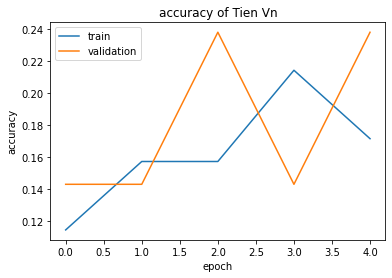

In [6]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_path = '/content/drive/MyDrive/Money/'
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/Money/Train/',
                                       target_size = (700,300),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Money/Test/',
                                       target_size = (700,300),
                                       class_mode = 'categorical')
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(700,300,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=5,batch_size=128,validation_data=validation_dataset,verbose=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of Tien Vn')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()